# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Loading Raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocess the raw data

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Determining the variable of interest

In [4]:
data = raw_data.drop(['Model'],axis=1) #To drop a column, Dataframe.drop([ColumnName],axis=1) axis=0 for row, axis=1 for column

In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with Missing Value

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Rule of thumb: If what we are removing < 5%, we are free to remove all the observations with missing values

In [7]:
data_no_mv = data.dropna(axis=0) # DataFrame.dropna(axis=0) this will remove all the observations with missing values.

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


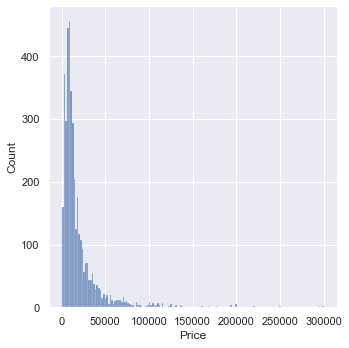

In [9]:
sns.displot(data_no_mv['Price'])

In [10]:
q = data_no_mv['Price'].quantile(.975)
data_1 = data_no_mv[data_no_mv['Price']<q]

In [11]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3924,3924.000000,3924,3924.000000,3924.000000,3924,3924,3924.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1514,NaN,NaN,1807,3553,NaN
mean,NaN,16441.497951,NaN,167.526758,2.733889,NaN,NaN,2006.153925
std,NaN,15328.009154,NaN,101.656362,4.992042,NaN,NaN,6.625849
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,96.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11157.500000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20500.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000


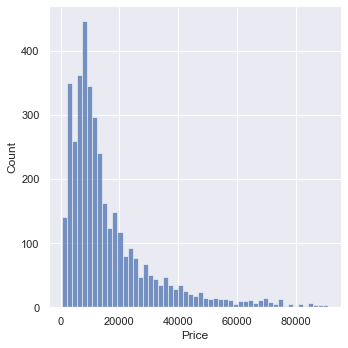

In [12]:
sns.displot(data_1['Price'])

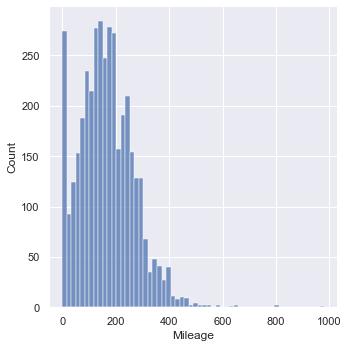

In [13]:
sns.displot(data_1['Mileage'])

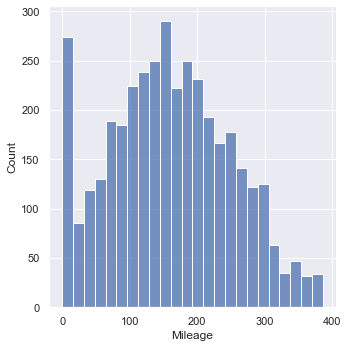

In [14]:
q = data_1['Mileage'].quantile(.975)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'])

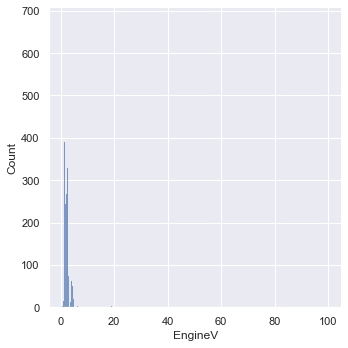

In [15]:
sns.displot(data_2['EngineV'])

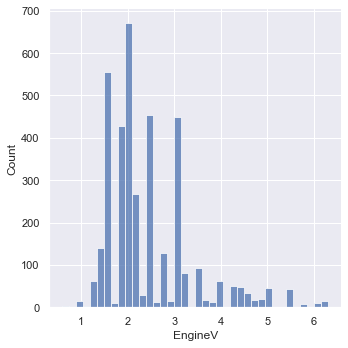

In [16]:
data_3 =data_2[data_2['EngineV']<6.5]
sns.displot(data_3['EngineV'])

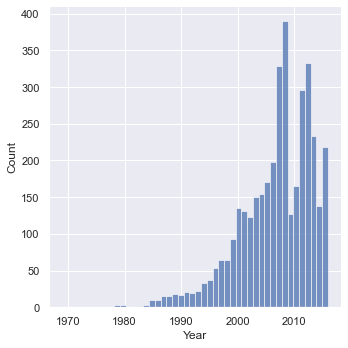

In [17]:
sns.displot(data_3['Year'])

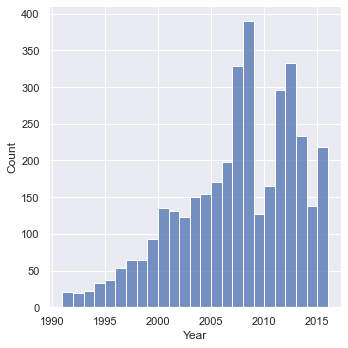

In [18]:
q = data_3['Year'].quantile(0.025)
data_4 = data_3[data_3['Year']>q]
sns.displot(data_4['Year'])

In [19]:
data_cleaned = data_4.reset_index(drop=True)

In [20]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3699,3699.000000,3699,3699.000000,3699.000000,3699,3699,3699.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,825,NaN,1389,NaN,NaN,1723,3348,NaN
mean,NaN,17133.712384,NaN,158.369289,2.440105,NaN,NaN,2006.984861
std,NaN,15433.570341,NaN,89.247421,0.950073,NaN,NaN,5.576576
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1991.000000
25%,NaN,7500.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21300.000000,NaN,220.000000,3.000000,NaN,NaN,2011.000000


# OLS Assumptions Relax

1. Check for linearity

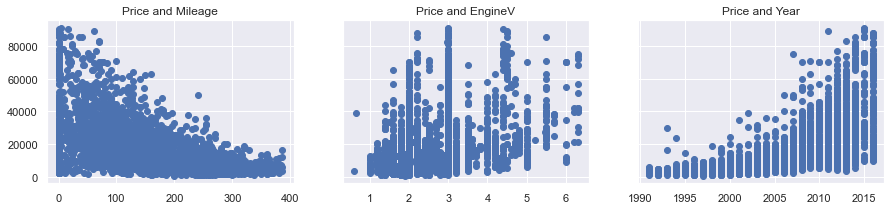

In [21]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Price and Mileage')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Price and Year')

plt.show()

In [22]:
log_price = np.log(data_cleaned['Price'])

In [23]:
data_cleaned['log_price'] = log_price #adding a new column in the dataset

In [24]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3694,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3695,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3696,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3697,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


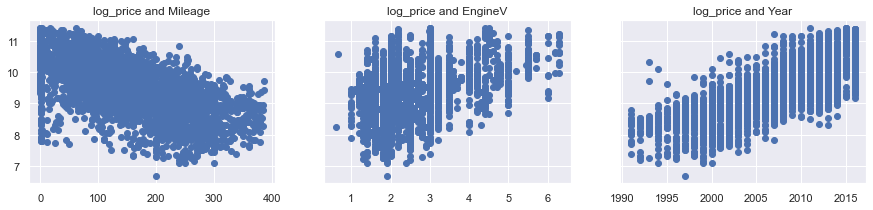

In [25]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax1.set_title('log_price and Mileage')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')

ax3.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax3.set_title('log_price and Year')

plt.show()

In [26]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3694,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3695,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3696,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3697,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


In [27]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [28]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...
3694,Renault,sedan,152,1.6,Petrol,yes,2007,8.824678
3695,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3696,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3697,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


2. Check for no endogeneity
There are tests to check this assumptions. We will discuss it when the regression is done. If we check something totally unexpected while prediction. We can check for omiited variable bias.


3. Check for Normality and Heteroscadesticity of errors
Normality is assumed in big sample data following the central limit theorem.
Heteroscadesticity is shown in the previous graphs. So we are okay in here

4. Check for no autocorrelation of error
we don't need to put much effort on this assumptions. As our data is not coming from time series data or panel data, we are safe here.
Autocorrelation can be specified from statsmodels summary.
Durbin-Watson value indicates this assumptions. It ranges from 1-4.
1>DW>3 is considered Danger. (Linear regression can't be perform)
1<DW<4 is okay

5. check for multicollinearity of independent variables

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [31]:
vif

,VIF,Features
0,4.126979,Mileage
1,10.366776,Year
2,7.602561,EngineV


In [32]:
data_refined = data_cleaned.drop(['Year'],axis=1)

In [33]:
data_refined

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...
3694,Renault,sedan,152,1.6,Petrol,yes,8.824678
3695,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3696,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3697,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Created dummies ( Categorical values)

In [34]:
data_with_dummies = pd.get_dummies(data_refined, drop_first=True)

In [35]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,152,1.6,8.824678,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3695,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3696,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3697,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
variables2 = data_with_dummies[data_with_dummies.columns.values]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif['Features'] = variables2.columns.values

In [38]:
vif

,VIF,Features
0,4.845317,Mileage
1,13.321850,EngineV
2,43.110831,log_price
3,2.605205,Brand_BMW
4,2.979832,Brand_Mercedes-Benz
5,1.855215,Brand_Mitsubishi
6,2.328488,Brand_Renault
7,2.445604,Brand_Toyota
8,3.360384,Brand_Volkswagen
9,1.596634,Body_hatch


without dummies, numerical feature er vif value
with dummies, same numerical feature er vif value increased kno?

In [39]:
#re-rarranging the dataset
data_refined.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'log_price'], dtype=object)

In [40]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [41]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [42]:
data_with_dummies = data_with_dummies[cols]

In [43]:
data_with_dummies

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,8.824678,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3695,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3696,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3697,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [44]:
data_preprocessed = data_with_dummies
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,8.824678,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3695,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3696,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3697,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Linear Regression

### Declaring the target and input variables

In [45]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data ( Feature Scaling )

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [47]:
scaled_data = scaler.transform(inputs)

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(scaled_data,target,test_size=0.2,random_state=42)

### Regression itself

In [49]:
reg = LinearRegression()
reg.fit(inputs_train, target_train)

LinearRegression()

#### Checking the model

In [50]:
yhat = reg.predict(inputs_train)

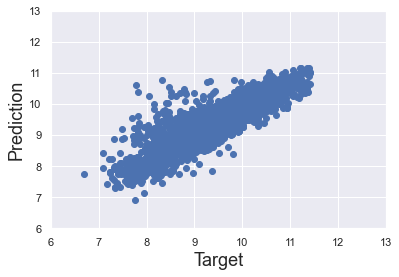

In [51]:
plt.scatter(target_train, yhat)
plt.xlabel('Target',fontsize=18)
plt.ylabel('Prediction',fontsize=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### another way to check is the residual plot

Text(0.5, 1.0, 'Residual PDFs')

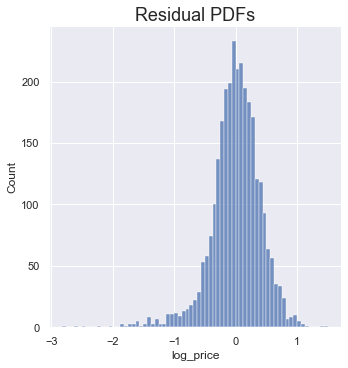

In [52]:
sns.displot(target_train-yhat)
plt.title('Residual PDFs',fontsize=18)

### R-squared , Bias and Weights

In [76]:
reg.score(inputs_train, target_train).round(3)

0.752

In [77]:
def get_adj_r2():
    r2=reg.score(inputs_train,target_train)
    n = inputs.shape[0]
    p = inputs.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)
adj_r2 = get_adj_r2()
adj_r2.round(3)

0.751

In [78]:
reg.intercept_

9.409233536265159

In [79]:
reg.coef_

array([-0.41211691,  0.21036522,  0.01156113, -0.01959687, -0.13959731,
       -0.19560847, -0.06272698, -0.09601012, -0.13473799, -0.09637337,
       -0.17738284, -0.11989266, -0.14893573, -0.11529353, -0.02359273,
       -0.14763145,  0.32719572])

In [80]:
summary = pd.DataFrame(data=inputs.columns.values,columns=['Features'])

In [81]:
summary['Weights'] = reg.coef_

In [82]:
summary

,Features,Weights
0,Mileage,-0.412117
1,EngineV,0.210365
2,Brand_BMW,0.011561
3,Brand_Mercedes-Benz,-0.019597
4,Brand_Mitsubishi,-0.139597
5,Brand_Renault,-0.195608
6,Brand_Toyota,-0.062727
7,Brand_Volkswagen,-0.096010
8,Body_hatch,-0.134738
9,Body_other,-0.096373


### check the weights interpretation notes on DS part-2

## Testing

In [83]:
yhat_test = reg.predict(inputs_test)

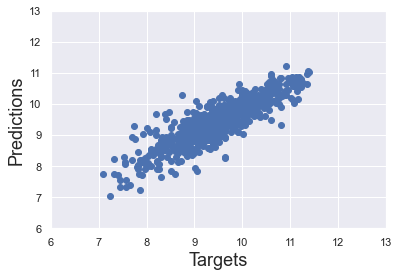

In [84]:
plt.scatter(target_test,yhat_test)
plt.xlabel('Targets',fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### Plot both the results together 

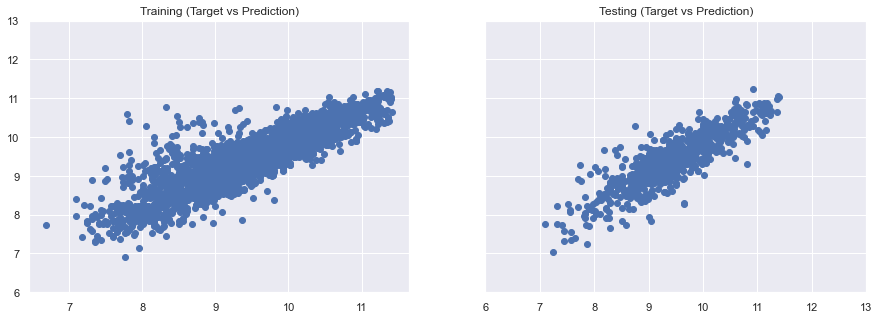

In [85]:
f,(train_results,test_results) = plt.subplots(1,2,sharey=True,figsize=(15,5))

train_results.scatter(target_train,yhat)
train_results.set_title('Training (Target vs Prediction)')

test_results.scatter(target_test,yhat_test)
test_results.set_title('Testing (Target vs Prediction)')

plt.xlim(6,13)
plt.ylim(6,13)

plt.show()


In [86]:
df_pf = pd.DataFrame(np.exp(yhat_test),columns=['Predictions test'])

In [87]:
df_pf['targets']= np.exp(target_test)

In [88]:
df_pf.head()

,Predictions test,targets
0,7179.285790,2350.0
1,10425.847965,10000.0
2,14234.997303,8100.0
3,29489.907761,35999.0
4,2312.999543,1199.0


In [89]:
target_test = target_test.reset_index(drop=True)

In [90]:
df_pf['targets']= np.exp(target_test)

In [91]:
df_pf.head()

,Predictions test,targets
0,7179.285790,2350.0
1,10425.847965,10000.0
2,14234.997303,8100.0
3,29489.907761,35999.0
4,2312.999543,1199.0


In [92]:
df_pf['Residuals'] = df_pf['targets']- df_pf['Predictions test']

In [93]:
df_pf['Difference in %'] = np.absolute(df_pf['Residuals']/df_pf['targets']*100).round(0)

In [94]:
df_pf = df_pf.sort_values(by='Difference in %')

In [95]:
df_pf

,Predictions test,targets,Residuals,Difference in %
328,13667.320481,13600.0,-67.320481,0.0
524,28865.291294,28900.0,34.708706,0.0
506,12856.477969,12900.0,43.522031,0.0
235,17496.763649,17500.0,3.236351,0.0
222,8538.485664,8500.0,-38.485664,0.0
...,...,...,...,...
78,17031.768158,4800.0,-12231.768158,255.0
704,15919.123083,4400.0,-11519.123083,262.0
210,15844.377969,3600.0,-12244.377969,340.0
295,29200.100751,6300.0,-22900.100751,363.0
